In [51]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from astropy.constants import c, eps0
import astropy.units as u

In [12]:
datafile = "parasitic_capacitance_Z_params.csv"
zparamdata = np.genfromtxt(datafile, comments='!', delimiter=' ', skip_header=8)

In [22]:
frequency = zparamdata[:, 0] * 1000 * u.MHz
Z11 = (zparamdata[:,1] + 1j * zparamdata[:,2]) * u.Ohm
Z12 = (zparamdata[:,3] + 1j * zparamdata[:,4]) * u.Ohm
Z21 = (zparamdata[:,5] + 1j * zparamdata[:,6]) * u.Ohm
Z22 = (zparamdata[:,7] + 1j * zparamdata[:,8]) * u.Ohm

In [16]:
detZ = Z11 * Z22 - Z12 * Z21
Y11 = Z22/detZ
Y12 = -Z12/detZ
Y21 = -Z21/detZ
Y22 = Z11/detZ

In [18]:
(Z12 - Z21)[:10] # Check if the system is indeed reciprocal

<Quantity [ 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
            0.+0.j, 0.+0.j, 0.+0.j] Ohm>

In [25]:
# - Y12 gives the capacitance between the coplanar layer and resonator tank
R = 1/np.real(-Y12) # Do we have any losses between the two
C = (np.imag(-Y12)/(2*np.pi*frequency)).to('pF')

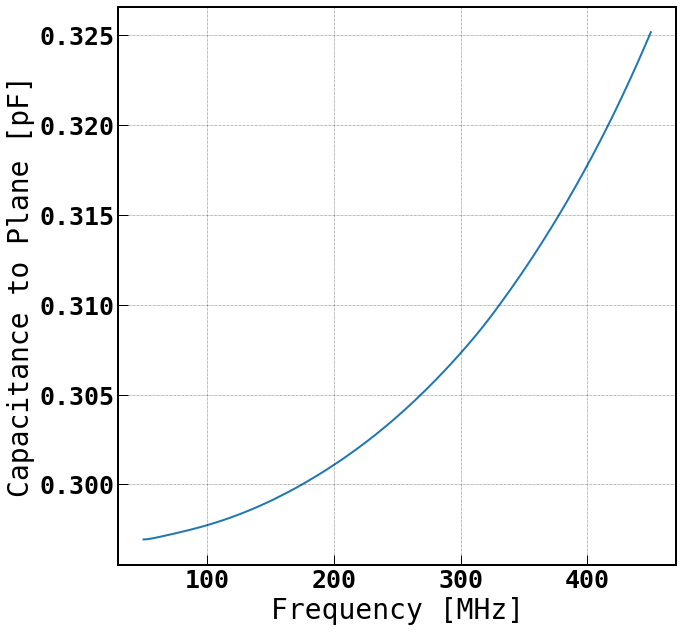

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(frequency, C)
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Capacitance to Plane [pF]')
ax.grid(True, which='both');
ax.axis('tight');

In [39]:
# Coupling of tank to ground 
C1g = (np.imag(Y11 + Y12)/(2*np.pi*frequency)).to('pF')
C2g = (np.imag(Y22 + Y12)/(2*np.pi*frequency)).to('pF')

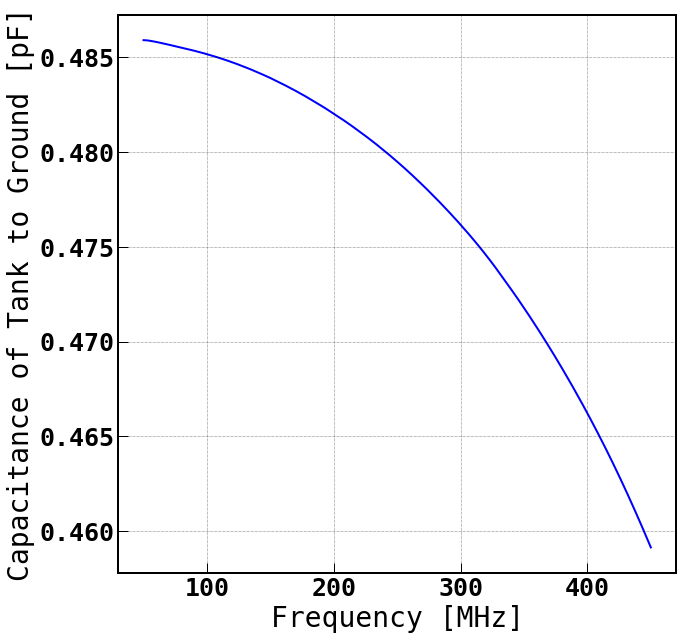

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(frequency, C1g, 'b')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Capacitance of Tank to Ground [pF]')
ax.grid(True, which='both');
ax.axis('tight');

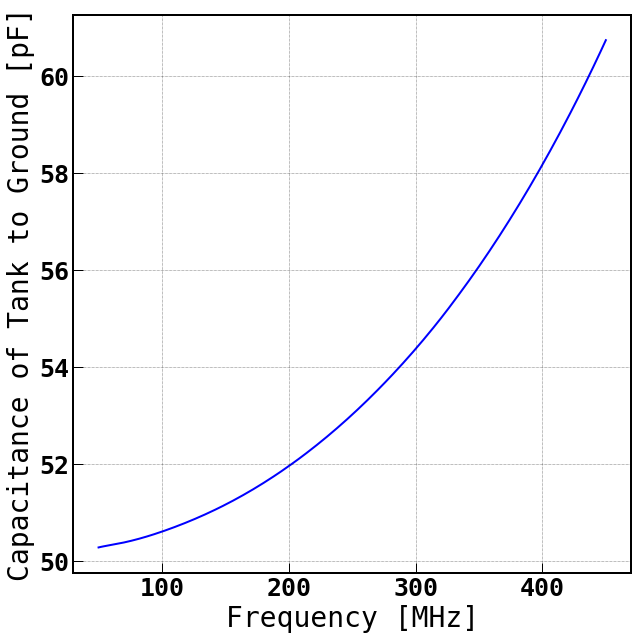

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(frequency, C2g, 'b')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Capacitance of Tank to Ground [pF]')
ax.grid(True, which='both');
ax.axis('tight');

In [50]:
# I want Y11 to cancel out with Y12
C_target = (np.imag(Y11)/(2*np.pi*frequency)).to('pF')

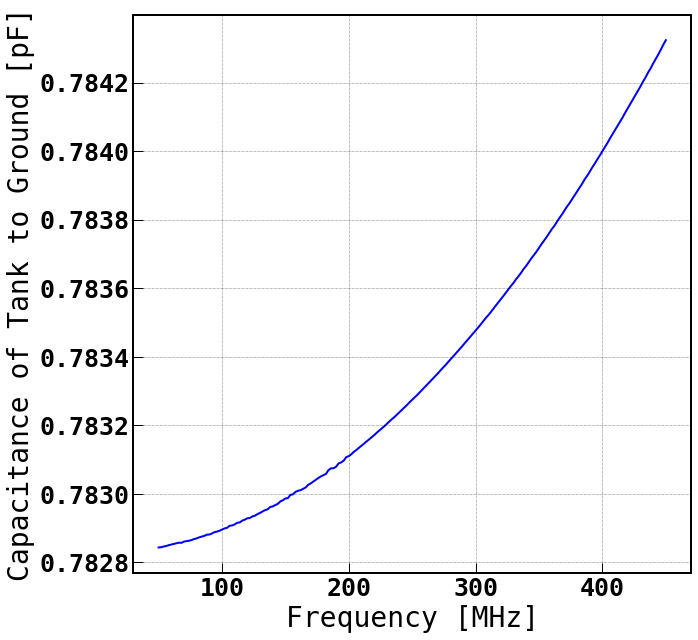

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(frequency, C_target, 'b')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Capacitance of Tank to Ground [pF]')
ax.grid(True, which='both');
ax.axis('tight');

In [55]:
np.imag(Y11)[:10]

<Quantity [ 0.00024594, 0.00025578, 0.00026561, 0.00027545, 0.00028529,
            0.00029513, 0.00030497, 0.00031481, 0.00032464, 0.00033448] 1 / Ohm>

In [56]:
np.imag(-Y12)[:10]

<Quantity [  9.32855581e-05,  9.70194594e-05,  1.00756788e-04,
             1.04496572e-04,  1.08238378e-04,  1.11981005e-04,
             1.15725564e-04,  1.19470963e-04,  1.23217628e-04,
             1.26964399e-04] 1 / Ohm>

In [ ]:
ax.set_t